In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
#df.describe()
#df.info()

df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [6]:
df.sort_values("price", ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


<AxesSubplot:xlabel='price', ylabel='Density'>

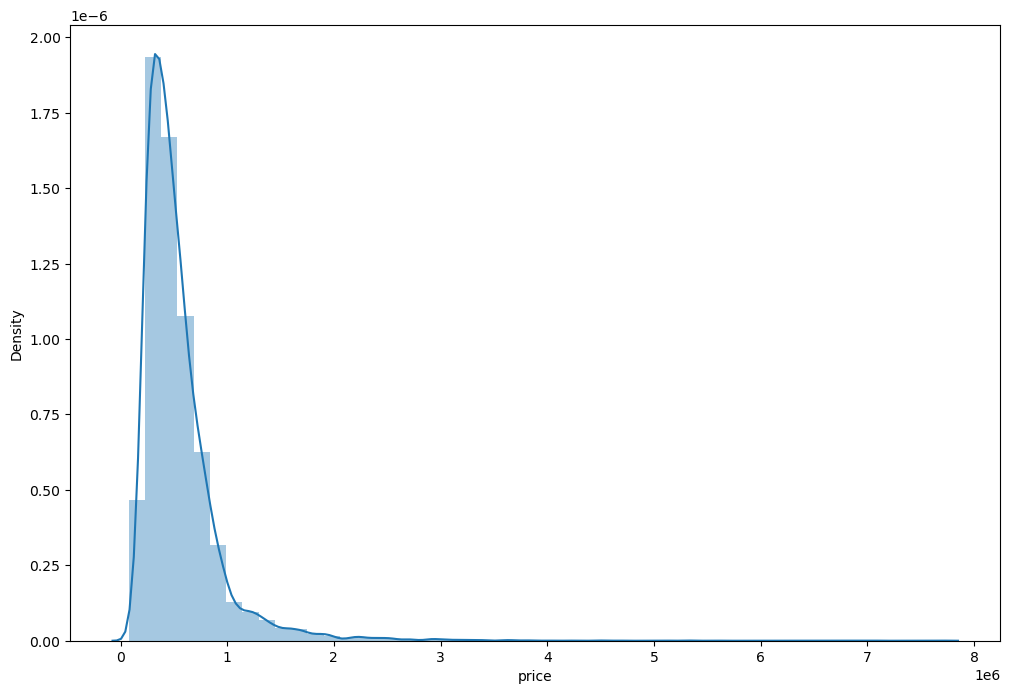

In [7]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

In [8]:
def round_bathrooms(df):
     # Round the 'bathrooms' column and convert to integers
    df['bathrooms'] = df['bathrooms'].round().astype(int)
    return df

In [9]:
df = round_bathrooms(df)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.loc[15870, 'bedrooms'] = 3

In [11]:
orginalsize = len(df)
orginalsize

21613

In [12]:
# Define function to remove outliers
def remove_outliers(df):
    # List of variables to check for outliers
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above',  
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    # Iterate over the variables and remove outliers
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [13]:
df = remove_outliers(df)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
newsize = len(df)
newsize

20058

In [15]:
def calculate_percentage_difference(orginalsize, newsize):
    # Calculate the percentage difference
    percentage_difference = (orginalsize - newsize) / orginalsize * 100
    # Round to 2 decimal places
    percentage_difference = round(percentage_difference, 2)
    return percentage_difference

In [16]:
calculate_percentage_difference(orginalsize, newsize)
#Calculate the percentage difference between two sizes

7.19

In [17]:
def remove_price_outliers (df) :
    """Remove price outliers from the input dataframe. 
    Outliers are defined as values that are
    more than 1.5 times the interquartile range above the third quartile.
    """
    # Sort the 'price' column
    sort_data = np.sort(df['price'])
    # Calculate the quartiles and interquartile range
    Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint') 
    Q2 = np.percentile(df['price'], 50, interpolation = 'midpoint') 
    Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1 
    # Calculate the upper limit for outliers
    upper = Q3+1.5*IQR
    print ('upper limit for price = ',upper)
    # Select rows where 'price' is an outlier and store in a separate dataframe
    price_out_liers = df[df['price']>upper]
    # Remove rows where 'price' is an outlier from the original dataframe
    df = df[df['price']<upper]
    return df 

In [18]:
df = remove_price_outliers(df)

upper limit for price =  1076000.0


# Getting the feauters by Pearson Correlation Matrix and stepwise selection
## 

In [19]:
def plot_correlation_matrix(df):
    # List of features to include in the correlation matrix
    all_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                    'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    # Create a mask to only show the lower triangle of the matrix
    mask = np.zeros_like(df[all_features].corr())
    triangle_indices = np.triu_indices_from(mask)
    mask[triangle_indices] = True

    # Set the figure size and title
    plt.figure(figsize=(16, 10))
    plt.title('Pearson Correlation Matrix', fontsize=25)

    # Plot the heatmap
    sns.heatmap(df[all_features].corr(), mask=mask, annot=True, annot_kws={"size": 12}, cmap='Blues', linewidths=0.25)
    sns.set_style('white')

    # Set the font sizes for the x and y ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Show the plot
    plt.show()
    

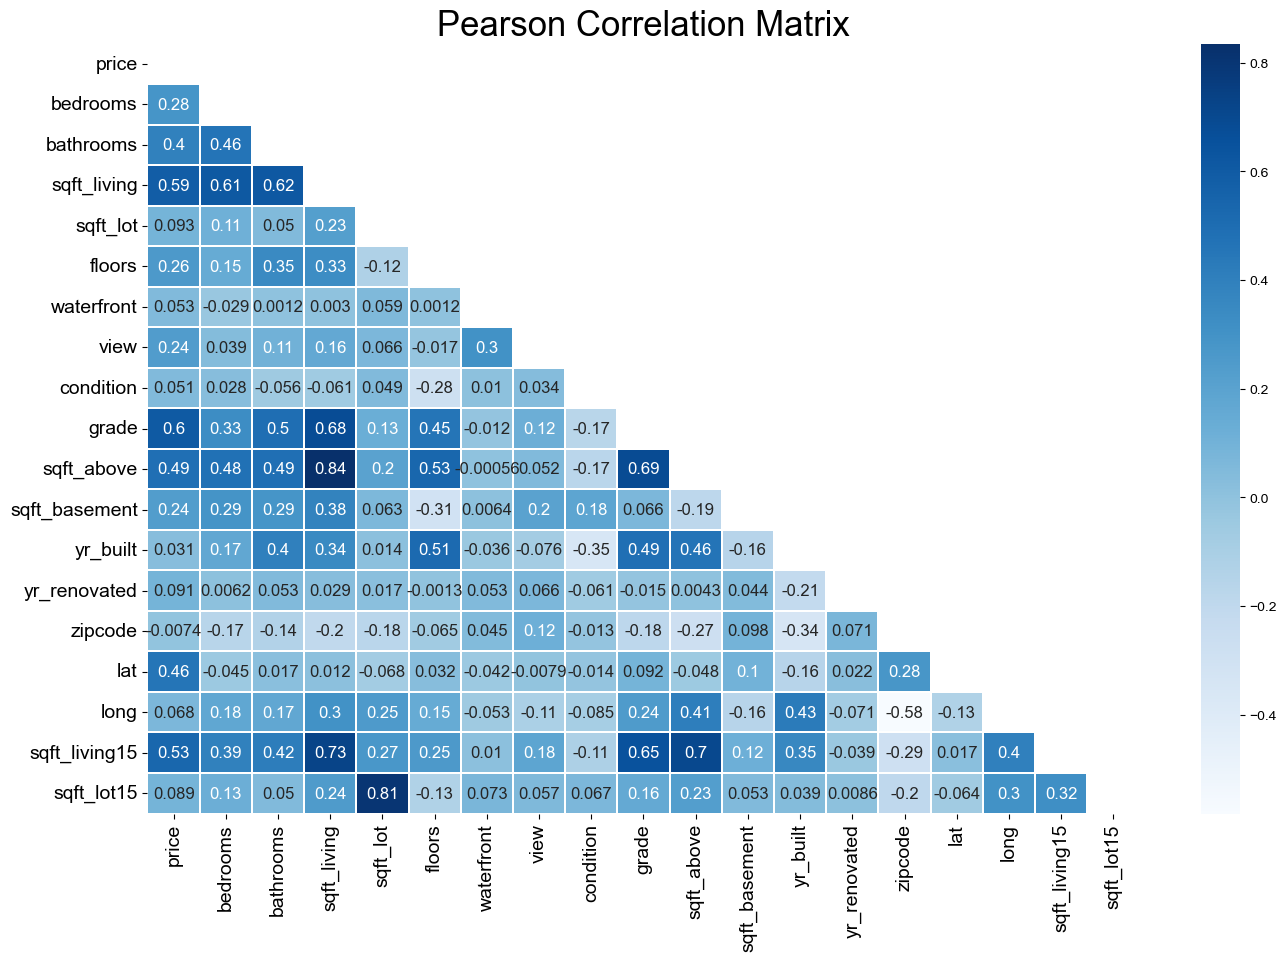

In [20]:
plot_correlation_matrix(df)

In [21]:
"""According to the Pearson Correlation Matrix, 
the features 'sqft_above' and 'sqft_living' are strongly correlated, so we removed 'sqft_above'. 
The feature 'sqft_living15' is moderately correlated with 'sqft_living', so we removed it.
Both 'sqft_lot' and 'sqft_lot15' are strongly correlated, but we decided to keep 'sqft_lot'.
We retained the features 'sqft_living' and 'sqft_lot'.
"""

def drop_correlated_features(df):
    # Drop correlated features
    df = df.drop(['id', 'date', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode'], axis=1)
    return df

# Drop correlated features from the dataframe
df = drop_correlated_features(df)

In [22]:
# Split the data into feature and target dataframes
# Create the feature dataframe
X = df.drop(['price'], axis=1)

# Create the target dataframe
y = df['price']

# Splitting the data

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [24]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):

        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:# Fit a model with the current list of included features and the new feature
                model = sm.OLS(y,        sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column] # Store the p-value of the new feature
            best_pval = new_pval.min() # Get the minimum p-value among the excluded features
            if best_pval < threshold_in: # If the minimum p-value is smaller than the threshold
                best_feature = new_pval.idxmin() # Get the feature with the minimum p-value
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Use  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax() # Get the maximum p-value among the included features
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [25]:
features_selected = stepwise_selection (X_train,y_train)
print ("Number of feauters used :",len(features_selected))

Use  lat                            with p-value 0.0
Use  sqft_living                    with p-value 0.0
Use  grade                          with p-value 0.0
Use  yr_built                       with p-value 0.0
Use  view                           with p-value 3.33049e-135
Use  condition                      with p-value 1.00272e-52
Use  floors                         with p-value 8.49877e-68
Use  bathrooms                      with p-value 2.81387e-18
Use  bedrooms                       with p-value 1.2069e-16
Use  waterfront                     with p-value 1.54177e-14
Use  long                           with p-value 8.64025e-12
Use  sqft_lot                       with p-value 5.33686e-06
Use  yr_renovated                   with p-value 4.20687e-05
Use  sqft_basement                  with p-value 0.000493102
Number of feauters used : 14


#### Save the dataframe for the 2nd Jupyter Notebook.

In [26]:
df.to_csv('kc_house_data_fixed.csv')

# Choosing appropriate model:


 ## Model 1 :  Linear regression  

### Model 1 :  Development

In [27]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training data
lm.fit(X_train, y_train)

# Model prediction on train data
y_pred = lm.predict(X_train)
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model metrics
acc_lm = metrics.r2_score(y_test, y_test_pred)
RMSE1T=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

###  Model 1:  Evaluation

In [28]:
def summary_statistics(model, X_train, y_train, X_test, y_test):

    print(f"Train set score: {model.score(X_train, y_train)}")
    print(f"Test set score: {model.score(X_test, y_test)}")
    print(f"Adjusted R^2: {1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)}")

In [29]:
summary_statistics(lm, X_train, y_train, X_test, y_test)
print('R^2:', acc_lm)
print('RMSE:',RMSE1T)



Train set score: 0.6776880196113666
Test set score: 0.6606161563789534
Adjusted R^2: 0.6774275053382044
R^2: 0.6606161563789534
RMSE: 114640.20284604379


In [30]:

# Add a constant term to the feature matrix
X_int = sm.add_constant(X_train)

# Fit an OLS model using the feature matrix and target vector
model = sm.OLS(y_train, X_int).fit()

# Generate a summary of the model's performance
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2601.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:14:44   Log-Likelihood:            -2.2637e+05
No. Observations:               17336   AIC:                         4.528e+05
Df Residuals:                   17321   BIC:                         4.529e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.621e+07   1.09e+06    -14.879

# Model 1: Visualizing the differences between actual prices and predicted prices


In [31]:
def plot_predicted_vs_actual(y_train, y_pred):
  # Create a scatter plot of the actual prices versus the predicted prices
  plt.scatter(y_train, y_pred)
  plt.xlabel("Prices")
  plt.ylabel("Predicted prices")
  plt.title("Prices vs Predicted prices")
  plt.show()

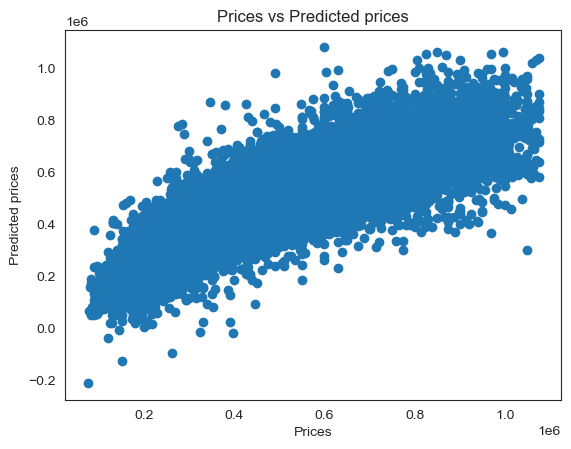

In [32]:
# Scatter plot of the actual prices versus the predicted prices

plot_predicted_vs_actual(y_train, y_pred)

In [33]:
def plot_predicted_vs_residuals(y_train, y_pred):
  # Create a scatter plot of the predicted prices versus the residuals (actual - predicted)
  plt.scatter(y_pred, y_train - y_pred)
  plt.title("Predicted vs residuals")
  plt.xlabel("Predicted")
  plt.ylabel("Residuals")
  plt.show()

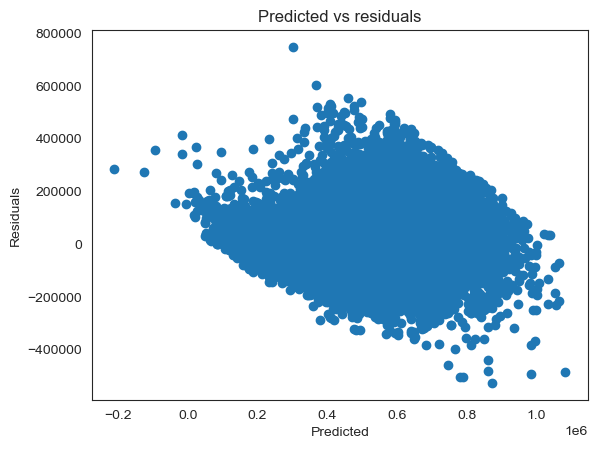

In [34]:
plot_predicted_vs_residuals(y_train, y_pred)

**The residuals are the errors that are not explained by the model.
If the residuals are randomly distributed around zero, it suggests that the model is a good fit for the data. On the other hand, if the residuals are not randomly distributed, it may indicate that the model is not a good fit for the data and that additional factors may need to be considered in the model.

# Model 2 : Decision Tree Regressor

### Model 2 :  Development

In [35]:
# Create a Decision Tree regressor
clf = tree.DecisionTreeRegressor(min_samples_split=13, max_depth=10, min_samples_leaf=10, max_leaf_nodes=320)

# Train the model using the training data
clf.fit(X_train, y_train)

# Predict the test data
y_pred = clf.predict(X_train)
# Predicting Test data with the model
y_test_pred = clf.predict(X_test)
# Model Metrics
acc_clf = metrics.r2_score(y_test, y_test_pred)
RMSE2T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

### Model 2 :  Evaluation

In [36]:
summary_statistics(clf, X_train, y_train, X_test, y_test)
print('R^2:', acc_clf)
print('RMSE:',RMSE2T)


Train set score: 0.8463599763811356
Test set score: 0.8015808610032387
Adjusted R^2: 0.8462357941554751
R^2: 0.8015808610032387
RMSE: 78315.45369147875


### Model 2 : Visualizing

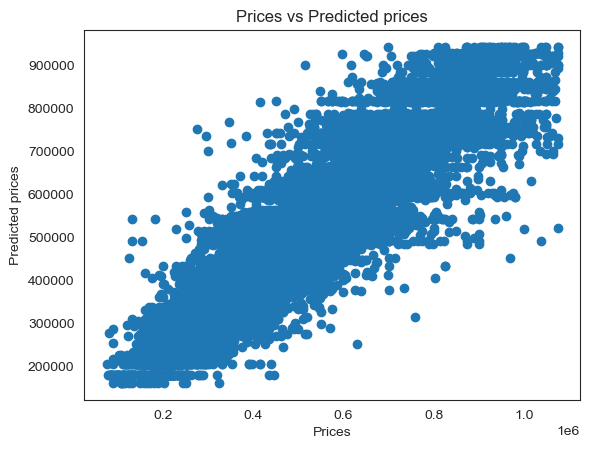

In [37]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

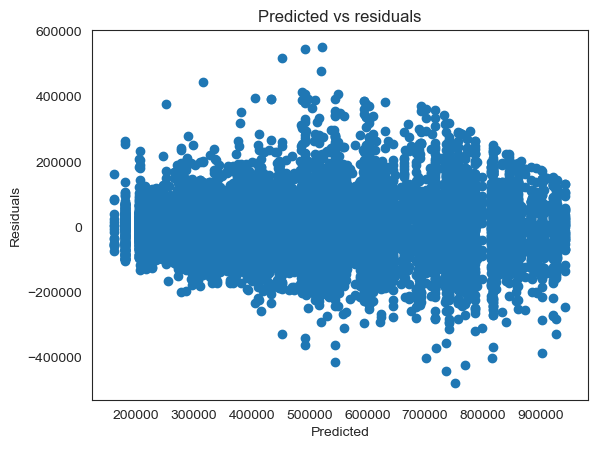

In [38]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

# Model 3 : Random Forest model

### Model 3 :  Development

In [39]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

# Fit the model to the training data with different hyperparameters
reg = RandomForestRegressor(n_estimators= 110, min_samples_split= 13, max_depth= 9) 
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model metrics
acc_reg = metrics.r2_score(y_test, y_test_pred)
RMSE3T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))


### Model 3: Best Paramters to use - using Randomized Search

#### *it will take a lot of time to run so we commented it.

In [40]:
# params = {'n_estimators':np.arange(100,200,10),'max_depth':np.arange(5,15),'min_samples_split':np.arange(1,10)}
# cv2 = RandomizedSearchCV(reg,params,cv=4,n_iter=25)
# cv2.fit(X_train, y_train)


In [41]:
# cv2.best_params_

#best parameters : {'n_estimators': 190, 'min_samples_split': 6, 'max_depth': 14}

### Model 3 :  Evaluation

In [42]:
summary_statistics(reg, X_train, y_train, X_test, y_test)
print('R^2:', acc_reg)
print('RMSE:',RMSE3T)

Train set score: 0.8722839793523208
Test set score: 0.8365056605045285
Adjusted R^2: 0.8721807506536852
R^2: 0.8365056605045285
RMSE: 71403.24920125079


### Model 3: Visualizing

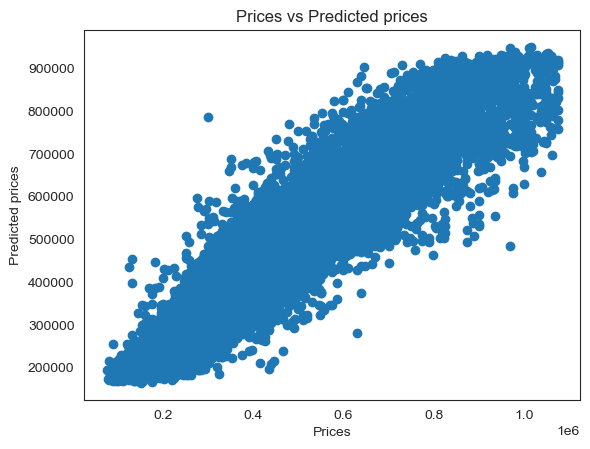

In [43]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

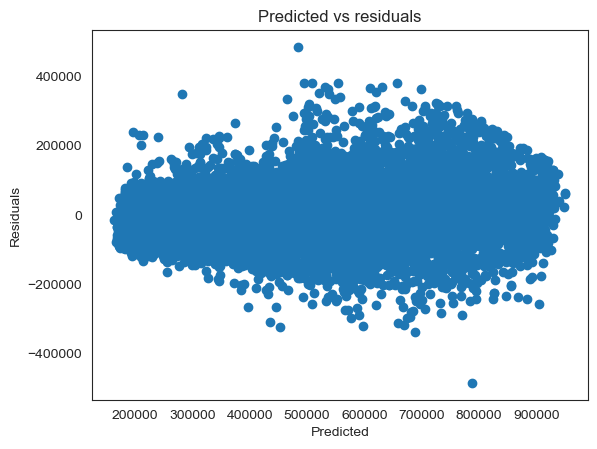

In [44]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

##   Model 4 : CatBoost model

###  Model 4 :  Development/Best parameters

#### *it will take a lot of time to run so we commented it.

In [45]:
# Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': np.arange(50, 200, 10),
#     'max_depth':np.arange(5,15),
#     'learning_rate': [0.1, 0.2, 0.3]
# }
# Create a randomized search object
#random_search = RandomizedSearchCV(cb, param_grid, cv=5, n_iter=10, scoring='neg_mean_squared_error')
# Fit the randomized search object to the training data
#random_search.fit(X_train, y_train)
# Print the best set of hyperparameters found
#print(random_search.best_params_)
#param_grid={'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.2}
# Use the best set of hyperparameters to create a model
# cb = CatBoostRegressor(**random_search.best_params_)


In [46]:
# Create a CatBoost Regressor
cb = CatBoostRegressor(n_estimators=170,max_depth=10,learning_rate=0.2)
# Fit the randomized search object to the training data
cb.fit(X_train, y_train)

# Model prediction on train data
y_pred = cb.predict(X_train)
# Fit the model to the training data
cb.fit(X_train, y_train)

# Model prediction on train data
y_pred = cb.predict(X_train)
# Predicting Test data with the model
y_test_pred = cb.predict(X_test)
# Model metrics
acc_cb = metrics.r2_score(y_test, y_test_pred)
RMSE4T = np.sqrt(metrics.mean_squared_error(y_train, y_pred))


0:	learn: 172971.5014334	total: 162ms	remaining: 27.4s
1:	learn: 151304.0952475	total: 175ms	remaining: 14.7s
2:	learn: 135410.5350933	total: 188ms	remaining: 10.4s
3:	learn: 123012.3329196	total: 200ms	remaining: 8.31s
4:	learn: 113786.2488552	total: 207ms	remaining: 6.84s
5:	learn: 106959.1792152	total: 220ms	remaining: 6s
6:	learn: 99841.2835246	total: 232ms	remaining: 5.4s
7:	learn: 94390.4479100	total: 247ms	remaining: 5s
8:	learn: 90980.9005073	total: 259ms	remaining: 4.63s
9:	learn: 88031.7997169	total: 272ms	remaining: 4.35s
10:	learn: 85306.1507524	total: 285ms	remaining: 4.12s
11:	learn: 83171.5817456	total: 297ms	remaining: 3.92s
12:	learn: 81785.6442810	total: 311ms	remaining: 3.75s
13:	learn: 80762.4739770	total: 327ms	remaining: 3.65s
14:	learn: 79789.9690157	total: 340ms	remaining: 3.51s
15:	learn: 78961.6421442	total: 354ms	remaining: 3.41s
16:	learn: 77485.5748639	total: 369ms	remaining: 3.32s
17:	learn: 76647.8204755	total: 386ms	remaining: 3.26s
18:	learn: 76173.0612

151:	learn: 51085.6869480	total: 2.94s	remaining: 348ms
152:	learn: 50904.7104299	total: 2.96s	remaining: 329ms
153:	learn: 50833.6182456	total: 2.98s	remaining: 310ms
154:	learn: 50759.4802081	total: 3.01s	remaining: 291ms
155:	learn: 50652.2311149	total: 3.03s	remaining: 272ms
156:	learn: 50573.8974237	total: 3.04s	remaining: 252ms
157:	learn: 50486.2901867	total: 3.06s	remaining: 232ms
158:	learn: 50387.9756184	total: 3.08s	remaining: 213ms
159:	learn: 50291.1932820	total: 3.09s	remaining: 193ms
160:	learn: 50190.2897598	total: 3.1s	remaining: 173ms
161:	learn: 50105.7650033	total: 3.12s	remaining: 154ms
162:	learn: 50074.0987525	total: 3.13s	remaining: 134ms
163:	learn: 49989.4787716	total: 3.15s	remaining: 115ms
164:	learn: 49885.6818880	total: 3.16s	remaining: 95.8ms
165:	learn: 49806.7281240	total: 3.18s	remaining: 76.6ms
166:	learn: 49609.8335257	total: 3.2s	remaining: 57.5ms
167:	learn: 49553.6821924	total: 3.21s	remaining: 38.3ms
168:	learn: 49470.0447132	total: 3.23s	remaini

135:	learn: 52528.4273452	total: 2.2s	remaining: 550ms
136:	learn: 52430.4105348	total: 2.21s	remaining: 533ms
137:	learn: 52394.8494017	total: 2.23s	remaining: 517ms
138:	learn: 52270.9812405	total: 2.24s	remaining: 500ms
139:	learn: 52142.4012737	total: 2.26s	remaining: 484ms
140:	learn: 52074.4577110	total: 2.27s	remaining: 467ms
141:	learn: 51987.9987229	total: 2.28s	remaining: 450ms
142:	learn: 51851.2876786	total: 2.3s	remaining: 434ms
143:	learn: 51700.7219523	total: 2.31s	remaining: 417ms
144:	learn: 51625.5393980	total: 2.33s	remaining: 401ms
145:	learn: 51503.4411063	total: 2.34s	remaining: 385ms
146:	learn: 51408.2858693	total: 2.35s	remaining: 368ms
147:	learn: 51345.0888526	total: 2.36s	remaining: 351ms
148:	learn: 51287.0479403	total: 2.38s	remaining: 335ms
149:	learn: 51246.1346075	total: 2.39s	remaining: 319ms
150:	learn: 51173.0146776	total: 2.4s	remaining: 302ms
151:	learn: 51085.6869480	total: 2.42s	remaining: 286ms
152:	learn: 50904.7104299	total: 2.43s	remaining: 2

In [47]:
# Save model to a pickle file
model = (cb, X_train, y_train)
pickle.dump(model, open('Price_prediction_model.pkl','wb'))

### Model 4: Visualizing

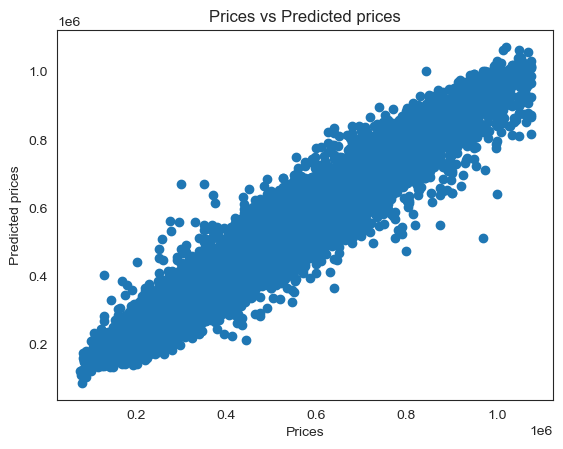

In [48]:
# Scatter plot of the actual prices versus the predicted prices
plot_predicted_vs_actual(y_train, y_pred)

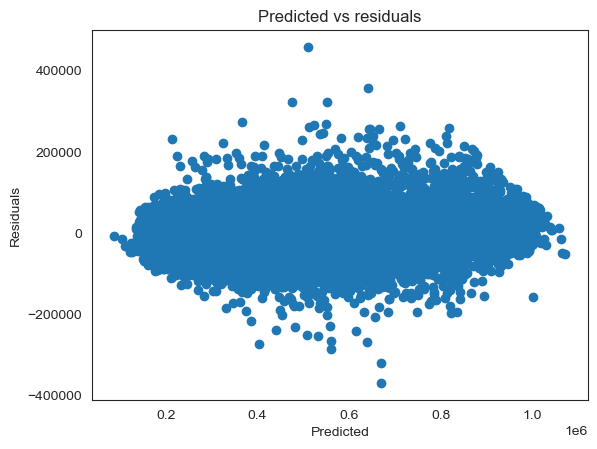

In [49]:
# Scatter plot of the predicted prices versus the residuals (actual - predicted)
plot_predicted_vs_residuals(y_train, y_pred)

0:	learn: 176769.2055414	total: 13.7ms	remaining: 2.32s
1:	learn: 156023.8322325	total: 27.3ms	remaining: 2.3s
2:	learn: 141044.0253662	total: 39.9ms	remaining: 2.22s
3:	learn: 127530.8237633	total: 50.4ms	remaining: 2.09s
4:	learn: 117375.1575797	total: 63.4ms	remaining: 2.09s
5:	learn: 109769.3675106	total: 74.4ms	remaining: 2.03s
6:	learn: 103073.1465534	total: 84.2ms	remaining: 1.96s
7:	learn: 97918.4315301	total: 93.8ms	remaining: 1.9s
8:	learn: 93051.2155322	total: 104ms	remaining: 1.87s
9:	learn: 89962.2053944	total: 115ms	remaining: 1.84s
10:	learn: 86076.5150692	total: 125ms	remaining: 1.81s
11:	learn: 83121.6014399	total: 135ms	remaining: 1.77s
12:	learn: 80352.9218546	total: 144ms	remaining: 1.74s
13:	learn: 78079.9060297	total: 156ms	remaining: 1.73s
14:	learn: 75796.3843511	total: 168ms	remaining: 1.73s
15:	learn: 73570.0451199	total: 180ms	remaining: 1.73s
16:	learn: 71611.2230347	total: 194ms	remaining: 1.75s
17:	learn: 70408.3757675	total: 206ms	remaining: 1.74s
18:	lea

166:	learn: 15757.8019421	total: 2.09s	remaining: 37.6ms
167:	learn: 15602.7760722	total: 2.1s	remaining: 25ms
168:	learn: 15467.0783423	total: 2.12s	remaining: 12.5ms
169:	learn: 15390.6996830	total: 2.13s	remaining: 0us
0:	learn: 175651.4279672	total: 11.2ms	remaining: 1.89s
1:	learn: 154041.4204000	total: 21.6ms	remaining: 1.81s
2:	learn: 138245.5249810	total: 32ms	remaining: 1.78s
3:	learn: 125627.9507576	total: 42.2ms	remaining: 1.75s
4:	learn: 115928.4126983	total: 52.4ms	remaining: 1.73s
5:	learn: 108339.5556365	total: 64.2ms	remaining: 1.75s
6:	learn: 102055.0910177	total: 75.2ms	remaining: 1.75s
7:	learn: 96516.8113834	total: 85.7ms	remaining: 1.74s
8:	learn: 92536.4719300	total: 96.5ms	remaining: 1.73s
9:	learn: 89398.4654939	total: 107ms	remaining: 1.72s
10:	learn: 87030.8772553	total: 119ms	remaining: 1.71s
11:	learn: 85150.9850420	total: 130ms	remaining: 1.71s
12:	learn: 82501.4789428	total: 142ms	remaining: 1.71s
13:	learn: 81109.2404062	total: 154ms	remaining: 1.72s
14:	

147:	learn: 37476.5225785	total: 1.81s	remaining: 269ms
148:	learn: 37308.6194552	total: 1.82s	remaining: 257ms
149:	learn: 37243.4090019	total: 1.83s	remaining: 245ms
150:	learn: 37059.8009498	total: 1.85s	remaining: 233ms
151:	learn: 36916.9801326	total: 1.86s	remaining: 221ms
152:	learn: 36842.6548091	total: 1.88s	remaining: 208ms
153:	learn: 36721.4598361	total: 1.89s	remaining: 196ms
154:	learn: 36561.2188544	total: 1.9s	remaining: 184ms
155:	learn: 36452.9327299	total: 1.92s	remaining: 172ms
156:	learn: 36369.7810407	total: 1.93s	remaining: 160ms
157:	learn: 36212.2254337	total: 1.94s	remaining: 148ms
158:	learn: 36044.2248840	total: 1.95s	remaining: 135ms
159:	learn: 35930.7167355	total: 1.97s	remaining: 123ms
160:	learn: 35830.0431112	total: 1.98s	remaining: 111ms
161:	learn: 35624.6276092	total: 1.99s	remaining: 98.4ms
162:	learn: 35477.9804587	total: 2.01s	remaining: 86.2ms
163:	learn: 35312.0245477	total: 2.02s	remaining: 73.9ms
164:	learn: 34991.5462726	total: 2.03s	remaini

132:	learn: 45413.6211194	total: 1.58s	remaining: 439ms
133:	learn: 45298.8168411	total: 1.59s	remaining: 428ms
134:	learn: 45241.9327774	total: 1.61s	remaining: 417ms
135:	learn: 45096.5737776	total: 1.62s	remaining: 405ms
136:	learn: 44933.6208903	total: 1.63s	remaining: 393ms
137:	learn: 44807.6810263	total: 1.65s	remaining: 381ms
138:	learn: 44615.7533712	total: 1.66s	remaining: 370ms
139:	learn: 44539.4608802	total: 1.67s	remaining: 358ms
140:	learn: 44431.8468288	total: 1.68s	remaining: 346ms
141:	learn: 44339.6037753	total: 1.69s	remaining: 334ms
142:	learn: 44227.7301688	total: 1.71s	remaining: 323ms
143:	learn: 44132.4399553	total: 1.72s	remaining: 311ms
144:	learn: 43890.0731796	total: 1.73s	remaining: 299ms
145:	learn: 43719.6295359	total: 1.74s	remaining: 287ms
146:	learn: 43618.8568851	total: 1.76s	remaining: 275ms
147:	learn: 43519.2853166	total: 1.77s	remaining: 263ms
148:	learn: 43480.3297073	total: 1.78s	remaining: 251ms
149:	learn: 43342.7630753	total: 1.79s	remaining

113:	learn: 51037.4671199	total: 1.55s	remaining: 762ms
114:	learn: 50895.8259290	total: 1.57s	remaining: 750ms
115:	learn: 50781.2429297	total: 1.59s	remaining: 738ms
116:	learn: 50673.9625193	total: 1.6s	remaining: 725ms
117:	learn: 50591.2183122	total: 1.62s	remaining: 712ms
118:	learn: 50574.9172621	total: 1.63s	remaining: 699ms
119:	learn: 50344.6553634	total: 1.65s	remaining: 686ms
120:	learn: 50216.5882832	total: 1.66s	remaining: 673ms
121:	learn: 50108.1802196	total: 1.68s	remaining: 659ms
122:	learn: 49931.5926041	total: 1.69s	remaining: 645ms
123:	learn: 49780.5335581	total: 1.7s	remaining: 632ms
124:	learn: 49657.8619428	total: 1.72s	remaining: 618ms
125:	learn: 49497.7137744	total: 1.73s	remaining: 604ms
126:	learn: 49342.7506252	total: 1.74s	remaining: 590ms
127:	learn: 49245.7012541	total: 1.75s	remaining: 575ms
128:	learn: 49160.7479545	total: 1.77s	remaining: 561ms
129:	learn: 49059.9973867	total: 1.78s	remaining: 548ms
130:	learn: 48927.6634085	total: 1.8s	remaining: 5

101:	learn: 54668.7704926	total: 1.48s	remaining: 987ms
102:	learn: 54470.5606823	total: 1.5s	remaining: 976ms
103:	learn: 54372.1353716	total: 1.52s	remaining: 966ms
104:	learn: 54355.9465430	total: 1.54s	remaining: 951ms
105:	learn: 54182.6058041	total: 1.55s	remaining: 937ms
106:	learn: 54065.4195312	total: 1.56s	remaining: 922ms
107:	learn: 53920.7620641	total: 1.58s	remaining: 906ms
108:	learn: 53669.3747790	total: 1.59s	remaining: 891ms
109:	learn: 53558.1592901	total: 1.6s	remaining: 876ms
110:	learn: 53363.2169405	total: 1.62s	remaining: 861ms
111:	learn: 53305.7787139	total: 1.63s	remaining: 845ms
112:	learn: 53183.3660829	total: 1.64s	remaining: 830ms
113:	learn: 53058.8515719	total: 1.66s	remaining: 814ms
114:	learn: 52948.3036392	total: 1.67s	remaining: 799ms
115:	learn: 52831.5274323	total: 1.68s	remaining: 784ms
116:	learn: 52665.4773634	total: 1.7s	remaining: 768ms
117:	learn: 52509.5910998	total: 1.71s	remaining: 753ms
118:	learn: 52408.5017044	total: 1.72s	remaining: 7

91:	learn: 29379.0511489	total: 1.07s	remaining: 910ms
92:	learn: 29192.7077386	total: 1.08s	remaining: 898ms
93:	learn: 29006.2564947	total: 1.09s	remaining: 886ms
94:	learn: 28829.3215201	total: 1.11s	remaining: 874ms
95:	learn: 28500.6739190	total: 1.12s	remaining: 863ms
96:	learn: 28346.6255312	total: 1.13s	remaining: 850ms
97:	learn: 27971.2692443	total: 1.14s	remaining: 837ms
98:	learn: 27847.8783090	total: 1.15s	remaining: 825ms
99:	learn: 27524.6017584	total: 1.16s	remaining: 813ms
100:	learn: 27310.3620193	total: 1.17s	remaining: 800ms
101:	learn: 27122.0393466	total: 1.18s	remaining: 788ms
102:	learn: 26888.0971294	total: 1.19s	remaining: 775ms
103:	learn: 26653.2179108	total: 1.2s	remaining: 765ms
104:	learn: 26319.1959207	total: 1.22s	remaining: 754ms
105:	learn: 26047.1989877	total: 1.23s	remaining: 744ms
106:	learn: 25853.0004132	total: 1.25s	remaining: 733ms
107:	learn: 25688.5686007	total: 1.26s	remaining: 722ms
108:	learn: 25520.4229666	total: 1.27s	remaining: 709ms
10

82:	learn: 49278.9178169	total: 1.11s	remaining: 1.17s
83:	learn: 48968.4822260	total: 1.13s	remaining: 1.15s
84:	learn: 48683.0217904	total: 1.14s	remaining: 1.14s
85:	learn: 48455.8795059	total: 1.15s	remaining: 1.13s
86:	learn: 48132.3935613	total: 1.16s	remaining: 1.11s
87:	learn: 47993.0096855	total: 1.18s	remaining: 1.1s
88:	learn: 47736.9567205	total: 1.19s	remaining: 1.08s
89:	learn: 47436.2041715	total: 1.2s	remaining: 1.07s
90:	learn: 47262.3043442	total: 1.21s	remaining: 1.05s
91:	learn: 47031.1329509	total: 1.22s	remaining: 1.03s
92:	learn: 46772.4365320	total: 1.23s	remaining: 1.02s
93:	learn: 46491.9065926	total: 1.24s	remaining: 1s
94:	learn: 46260.4254296	total: 1.25s	remaining: 989ms
95:	learn: 46122.3772453	total: 1.26s	remaining: 974ms
96:	learn: 45921.7404783	total: 1.27s	remaining: 959ms
97:	learn: 45746.1271489	total: 1.28s	remaining: 944ms
98:	learn: 45651.8463448	total: 1.3s	remaining: 930ms
99:	learn: 45545.8587920	total: 1.31s	remaining: 915ms
100:	learn: 4530

69:	learn: 56864.8384902	total: 929ms	remaining: 1.33s
70:	learn: 56673.8582783	total: 943ms	remaining: 1.31s
71:	learn: 56402.8407393	total: 960ms	remaining: 1.31s
72:	learn: 56168.5729735	total: 974ms	remaining: 1.29s
73:	learn: 55998.5005769	total: 987ms	remaining: 1.28s
74:	learn: 55731.9047265	total: 998ms	remaining: 1.26s
75:	learn: 55408.2194648	total: 1.01s	remaining: 1.25s
76:	learn: 54988.6354132	total: 1.02s	remaining: 1.23s
77:	learn: 54864.1092540	total: 1.03s	remaining: 1.22s
78:	learn: 54606.0032825	total: 1.04s	remaining: 1.2s
79:	learn: 54404.9482345	total: 1.05s	remaining: 1.18s
80:	learn: 54189.4041511	total: 1.06s	remaining: 1.17s
81:	learn: 54029.5673900	total: 1.07s	remaining: 1.15s
82:	learn: 53897.2497219	total: 1.08s	remaining: 1.14s
83:	learn: 53680.9878732	total: 1.1s	remaining: 1.12s
84:	learn: 53523.8685785	total: 1.11s	remaining: 1.11s
85:	learn: 53393.1101809	total: 1.12s	remaining: 1.09s
86:	learn: 53139.5306581	total: 1.13s	remaining: 1.08s
87:	learn: 5

49:	learn: 63272.0663986	total: 783ms	remaining: 1.88s
50:	learn: 62835.2699218	total: 798ms	remaining: 1.86s
51:	learn: 62653.8498994	total: 814ms	remaining: 1.85s
52:	learn: 62430.4470433	total: 830ms	remaining: 1.83s
53:	learn: 62244.4924755	total: 845ms	remaining: 1.81s
54:	learn: 61826.1276332	total: 860ms	remaining: 1.8s
55:	learn: 61657.9161324	total: 877ms	remaining: 1.78s
56:	learn: 61466.8512491	total: 892ms	remaining: 1.77s
57:	learn: 61311.5731517	total: 909ms	remaining: 1.75s
58:	learn: 61065.4994064	total: 925ms	remaining: 1.74s
59:	learn: 60757.3309676	total: 943ms	remaining: 1.73s
60:	learn: 60558.2271939	total: 958ms	remaining: 1.71s
61:	learn: 60297.4662759	total: 977ms	remaining: 1.7s
62:	learn: 60030.3781019	total: 995ms	remaining: 1.69s
63:	learn: 59788.1848868	total: 1.02s	remaining: 1.68s
64:	learn: 59583.3627353	total: 1.04s	remaining: 1.68s
65:	learn: 59301.4794289	total: 1.06s	remaining: 1.67s
66:	learn: 59082.2421308	total: 1.08s	remaining: 1.66s
67:	learn: 5

27:	learn: 72163.9961225	total: 377ms	remaining: 1.91s
28:	learn: 71756.6302481	total: 392ms	remaining: 1.91s
29:	learn: 71172.4954045	total: 407ms	remaining: 1.9s
30:	learn: 70902.1865688	total: 419ms	remaining: 1.88s
31:	learn: 70585.6295367	total: 432ms	remaining: 1.86s
32:	learn: 69815.1800099	total: 446ms	remaining: 1.85s
33:	learn: 69538.0180948	total: 459ms	remaining: 1.83s
34:	learn: 68946.0954599	total: 472ms	remaining: 1.82s
35:	learn: 68478.0376823	total: 484ms	remaining: 1.8s
36:	learn: 68249.5766603	total: 496ms	remaining: 1.78s
37:	learn: 68038.8777798	total: 509ms	remaining: 1.77s
38:	learn: 67862.5685395	total: 522ms	remaining: 1.75s
39:	learn: 67643.5994319	total: 536ms	remaining: 1.74s
40:	learn: 67440.8945819	total: 551ms	remaining: 1.73s
41:	learn: 67061.2046435	total: 568ms	remaining: 1.73s
42:	learn: 66504.6446627	total: 586ms	remaining: 1.73s
43:	learn: 66256.0317360	total: 604ms	remaining: 1.73s
44:	learn: 66088.9189111	total: 621ms	remaining: 1.73s
45:	learn: 6

9:	learn: 95833.3783026	total: 105ms	remaining: 1.67s
10:	learn: 92144.3491555	total: 117ms	remaining: 1.69s
11:	learn: 88190.3259817	total: 128ms	remaining: 1.69s
12:	learn: 84401.2346406	total: 139ms	remaining: 1.68s
13:	learn: 82810.2747192	total: 150ms	remaining: 1.67s
14:	learn: 81099.0894415	total: 161ms	remaining: 1.66s
15:	learn: 78664.3382590	total: 170ms	remaining: 1.64s
16:	learn: 77038.5381360	total: 180ms	remaining: 1.62s
17:	learn: 75471.9559997	total: 190ms	remaining: 1.6s
18:	learn: 73734.6421029	total: 200ms	remaining: 1.59s
19:	learn: 72602.1733518	total: 210ms	remaining: 1.58s
20:	learn: 71507.8160614	total: 220ms	remaining: 1.56s
21:	learn: 70719.7605520	total: 231ms	remaining: 1.55s
22:	learn: 68730.5677794	total: 241ms	remaining: 1.54s
23:	learn: 67724.4215526	total: 251ms	remaining: 1.53s
24:	learn: 67038.4697327	total: 261ms	remaining: 1.51s
25:	learn: 66406.2638804	total: 271ms	remaining: 1.5s
26:	learn: 65665.4276359	total: 281ms	remaining: 1.49s
27:	learn: 64

168:	learn: 16832.9784102	total: 1.8s	remaining: 10.7ms
169:	learn: 16710.1972316	total: 1.81s	remaining: 0us
0:	learn: 176773.4830543	total: 13.1ms	remaining: 2.21s
1:	learn: 155314.5063842	total: 23.7ms	remaining: 1.99s
2:	learn: 139365.5519308	total: 35.1ms	remaining: 1.95s
3:	learn: 127014.8834407	total: 45.9ms	remaining: 1.91s
4:	learn: 117056.4339623	total: 57.1ms	remaining: 1.88s
5:	learn: 108926.2302585	total: 67.6ms	remaining: 1.85s
6:	learn: 102954.5362491	total: 78ms	remaining: 1.82s
7:	learn: 98154.0381680	total: 88.6ms	remaining: 1.79s
8:	learn: 94469.3378072	total: 98.5ms	remaining: 1.76s
9:	learn: 90999.1158240	total: 109ms	remaining: 1.74s
10:	learn: 88798.9211669	total: 119ms	remaining: 1.72s
11:	learn: 85496.3954243	total: 130ms	remaining: 1.71s
12:	learn: 83676.5017134	total: 141ms	remaining: 1.7s
13:	learn: 81410.6900500	total: 152ms	remaining: 1.69s
14:	learn: 80165.9957732	total: 162ms	remaining: 1.68s
15:	learn: 78962.6831382	total: 175ms	remaining: 1.69s
16:	lea

147:	learn: 36363.7074814	total: 1.64s	remaining: 243ms
148:	learn: 36193.9851228	total: 1.65s	remaining: 232ms
149:	learn: 36005.0575816	total: 1.66s	remaining: 221ms
150:	learn: 35942.1565204	total: 1.67s	remaining: 210ms
151:	learn: 35746.5451392	total: 1.68s	remaining: 199ms
152:	learn: 35692.6781163	total: 1.69s	remaining: 188ms
153:	learn: 35621.9470506	total: 1.7s	remaining: 177ms
154:	learn: 35432.8065191	total: 1.71s	remaining: 166ms
155:	learn: 35358.2546675	total: 1.73s	remaining: 155ms
156:	learn: 35284.5075058	total: 1.74s	remaining: 144ms
157:	learn: 35215.5606173	total: 1.76s	remaining: 133ms
158:	learn: 35078.9587834	total: 1.77s	remaining: 122ms
159:	learn: 34956.4653484	total: 1.78s	remaining: 111ms
160:	learn: 34825.7290502	total: 1.8s	remaining: 100ms
161:	learn: 34612.5258576	total: 1.81s	remaining: 89.4ms
162:	learn: 34486.7323831	total: 1.82s	remaining: 78.2ms
163:	learn: 34359.0801852	total: 1.83s	remaining: 67.1ms
164:	learn: 34251.6418574	total: 1.85s	remainin

136:	learn: 45484.6423746	total: 1.57s	remaining: 380ms
137:	learn: 45354.4187181	total: 1.59s	remaining: 368ms
138:	learn: 45295.1905725	total: 1.6s	remaining: 357ms
139:	learn: 45250.4916666	total: 1.61s	remaining: 345ms
140:	learn: 45165.0311821	total: 1.62s	remaining: 334ms
141:	learn: 45022.6903829	total: 1.63s	remaining: 322ms
142:	learn: 44888.9305511	total: 1.65s	remaining: 311ms
143:	learn: 44804.1008801	total: 1.66s	remaining: 299ms
144:	learn: 44575.6923705	total: 1.67s	remaining: 288ms
145:	learn: 44467.7615592	total: 1.68s	remaining: 276ms
146:	learn: 44402.2227384	total: 1.69s	remaining: 264ms
147:	learn: 44195.4316462	total: 1.7s	remaining: 253ms
148:	learn: 44075.7770940	total: 1.71s	remaining: 241ms
149:	learn: 43940.8689474	total: 1.72s	remaining: 230ms
150:	learn: 43750.5782602	total: 1.74s	remaining: 219ms
151:	learn: 43672.0436640	total: 1.75s	remaining: 207ms
152:	learn: 43537.0635038	total: 1.76s	remaining: 196ms
153:	learn: 43434.0348510	total: 1.78s	remaining: 

131:	learn: 48837.5072076	total: 1.69s	remaining: 486ms
132:	learn: 48658.9631561	total: 1.71s	remaining: 475ms
133:	learn: 48558.9832002	total: 1.72s	remaining: 463ms
134:	learn: 48410.4222462	total: 1.74s	remaining: 451ms
135:	learn: 48331.7162408	total: 1.75s	remaining: 439ms
136:	learn: 48264.7850940	total: 1.77s	remaining: 427ms
137:	learn: 48172.4687997	total: 1.79s	remaining: 414ms
138:	learn: 48017.0247942	total: 1.8s	remaining: 402ms
139:	learn: 47897.9915793	total: 1.81s	remaining: 389ms
140:	learn: 47794.2174844	total: 1.83s	remaining: 376ms
141:	learn: 47627.2665782	total: 1.84s	remaining: 363ms
142:	learn: 47533.9534126	total: 1.85s	remaining: 350ms
143:	learn: 47383.5610817	total: 1.87s	remaining: 337ms
144:	learn: 47241.5655434	total: 1.88s	remaining: 324ms
145:	learn: 47167.9196600	total: 1.89s	remaining: 311ms
146:	learn: 47033.7018590	total: 1.9s	remaining: 298ms
147:	learn: 46868.9139467	total: 1.92s	remaining: 285ms
148:	learn: 46703.4498944	total: 1.93s	remaining: 

117:	learn: 53161.3197521	total: 1.56s	remaining: 689ms
118:	learn: 53054.8798494	total: 1.58s	remaining: 677ms
119:	learn: 53004.0494118	total: 1.59s	remaining: 664ms
120:	learn: 52931.6226248	total: 1.61s	remaining: 651ms
121:	learn: 52836.6477959	total: 1.62s	remaining: 637ms
122:	learn: 52724.6210512	total: 1.63s	remaining: 623ms
123:	learn: 52592.2336152	total: 1.64s	remaining: 610ms
124:	learn: 52407.0581269	total: 1.66s	remaining: 596ms
125:	learn: 52266.3638749	total: 1.67s	remaining: 583ms
126:	learn: 52210.4210609	total: 1.68s	remaining: 569ms
127:	learn: 52097.7866568	total: 1.69s	remaining: 556ms
128:	learn: 51986.3076103	total: 1.71s	remaining: 542ms
129:	learn: 51843.0901985	total: 1.72s	remaining: 529ms
130:	learn: 51737.5832819	total: 1.73s	remaining: 515ms
131:	learn: 51644.7969778	total: 1.74s	remaining: 502ms
132:	learn: 51536.6172778	total: 1.76s	remaining: 489ms
133:	learn: 51425.3003270	total: 1.77s	remaining: 475ms
134:	learn: 51300.0561914	total: 1.78s	remaining

111:	learn: 24936.9033073	total: 1.21s	remaining: 625ms
112:	learn: 24766.5280370	total: 1.22s	remaining: 616ms
113:	learn: 24647.5176130	total: 1.23s	remaining: 607ms
114:	learn: 24389.9335942	total: 1.25s	remaining: 597ms
115:	learn: 24308.5588364	total: 1.26s	remaining: 586ms
116:	learn: 24039.7350704	total: 1.27s	remaining: 576ms
117:	learn: 23863.3842272	total: 1.28s	remaining: 565ms
118:	learn: 23671.2387737	total: 1.29s	remaining: 554ms
119:	learn: 23453.3541953	total: 1.3s	remaining: 543ms
120:	learn: 23286.9887736	total: 1.31s	remaining: 532ms
121:	learn: 23122.1449769	total: 1.32s	remaining: 520ms
122:	learn: 22956.3574370	total: 1.33s	remaining: 509ms
123:	learn: 22790.0793258	total: 1.34s	remaining: 498ms
124:	learn: 22648.0214735	total: 1.35s	remaining: 487ms
125:	learn: 22354.9503256	total: 1.36s	remaining: 476ms
126:	learn: 22127.5685225	total: 1.37s	remaining: 465ms
127:	learn: 21989.5587437	total: 1.38s	remaining: 454ms
128:	learn: 21785.7611874	total: 1.39s	remaining:

94:	learn: 45633.2016766	total: 1.07s	remaining: 846ms
95:	learn: 45414.2371281	total: 1.08s	remaining: 835ms
96:	learn: 45055.6621938	total: 1.09s	remaining: 825ms
97:	learn: 44791.3840639	total: 1.11s	remaining: 813ms
98:	learn: 44563.0594823	total: 1.12s	remaining: 803ms
99:	learn: 44324.5727592	total: 1.13s	remaining: 792ms
100:	learn: 44176.0696408	total: 1.14s	remaining: 781ms
101:	learn: 43966.9739321	total: 1.15s	remaining: 769ms
102:	learn: 43811.1317672	total: 1.16s	remaining: 758ms
103:	learn: 43592.3082894	total: 1.17s	remaining: 746ms
104:	learn: 43371.5379657	total: 1.19s	remaining: 734ms
105:	learn: 43251.1187609	total: 1.2s	remaining: 723ms
106:	learn: 43030.9249534	total: 1.21s	remaining: 714ms
107:	learn: 42865.9253076	total: 1.23s	remaining: 704ms
108:	learn: 42620.9801435	total: 1.24s	remaining: 693ms
109:	learn: 42453.7663256	total: 1.25s	remaining: 683ms
110:	learn: 42299.6259116	total: 1.26s	remaining: 673ms
111:	learn: 42090.9407682	total: 1.28s	remaining: 663ms

72:	learn: 57111.1786001	total: 962ms	remaining: 1.28s
73:	learn: 56813.5607230	total: 974ms	remaining: 1.26s
74:	learn: 56560.9099240	total: 986ms	remaining: 1.25s
75:	learn: 56162.0135626	total: 997ms	remaining: 1.23s
76:	learn: 55860.7739128	total: 1.01s	remaining: 1.22s
77:	learn: 55628.8218351	total: 1.02s	remaining: 1.2s
78:	learn: 55422.8364040	total: 1.03s	remaining: 1.19s
79:	learn: 55148.0089253	total: 1.04s	remaining: 1.17s
80:	learn: 54863.8766925	total: 1.05s	remaining: 1.16s
81:	learn: 54715.0219143	total: 1.06s	remaining: 1.14s
82:	learn: 54597.9673220	total: 1.07s	remaining: 1.13s
83:	learn: 54412.0585130	total: 1.09s	remaining: 1.11s
84:	learn: 54178.5089149	total: 1.1s	remaining: 1.1s
85:	learn: 53992.0017133	total: 1.11s	remaining: 1.08s
86:	learn: 53839.9520122	total: 1.12s	remaining: 1.07s
87:	learn: 53682.1339547	total: 1.13s	remaining: 1.05s
88:	learn: 53586.1786293	total: 1.15s	remaining: 1.04s
89:	learn: 53362.8428280	total: 1.16s	remaining: 1.03s
90:	learn: 53

61:	learn: 60977.5060774	total: 896ms	remaining: 1.56s
62:	learn: 60653.9190997	total: 909ms	remaining: 1.54s
63:	learn: 60390.7686562	total: 927ms	remaining: 1.53s
64:	learn: 60058.3811626	total: 944ms	remaining: 1.52s
65:	learn: 59859.0033063	total: 959ms	remaining: 1.51s
66:	learn: 59686.6995776	total: 976ms	remaining: 1.5s
67:	learn: 59506.3767162	total: 992ms	remaining: 1.49s
68:	learn: 59309.7966460	total: 1.01s	remaining: 1.47s
69:	learn: 58995.7328332	total: 1.02s	remaining: 1.46s
70:	learn: 58637.7680872	total: 1.04s	remaining: 1.45s
71:	learn: 58338.0828485	total: 1.06s	remaining: 1.44s
72:	learn: 58175.5246790	total: 1.07s	remaining: 1.42s
73:	learn: 57957.0551716	total: 1.08s	remaining: 1.41s
74:	learn: 57762.3872092	total: 1.1s	remaining: 1.39s
75:	learn: 57559.1774324	total: 1.11s	remaining: 1.38s
76:	learn: 57424.3180430	total: 1.13s	remaining: 1.36s
77:	learn: 57261.6928248	total: 1.14s	remaining: 1.35s
78:	learn: 57103.7016432	total: 1.16s	remaining: 1.34s
79:	learn: 5

44:	learn: 66668.4358676	total: 662ms	remaining: 1.84s
45:	learn: 66326.2922052	total: 677ms	remaining: 1.82s
46:	learn: 66209.5411774	total: 690ms	remaining: 1.8s
47:	learn: 65843.9768941	total: 703ms	remaining: 1.79s
48:	learn: 65406.6636040	total: 717ms	remaining: 1.77s
49:	learn: 65093.3284309	total: 730ms	remaining: 1.75s
50:	learn: 64782.6502488	total: 742ms	remaining: 1.73s
51:	learn: 64621.4181441	total: 755ms	remaining: 1.71s
52:	learn: 64370.2876722	total: 767ms	remaining: 1.69s
53:	learn: 64169.7575187	total: 779ms	remaining: 1.67s
54:	learn: 64014.1663659	total: 791ms	remaining: 1.65s
55:	learn: 63771.3382946	total: 804ms	remaining: 1.64s
56:	learn: 63427.5454677	total: 816ms	remaining: 1.62s
57:	learn: 63149.6608358	total: 828ms	remaining: 1.6s
58:	learn: 63009.8013630	total: 840ms	remaining: 1.58s
59:	learn: 62736.1495890	total: 853ms	remaining: 1.56s
60:	learn: 62472.6504919	total: 866ms	remaining: 1.55s
61:	learn: 62189.9034668	total: 880ms	remaining: 1.53s
62:	learn: 6

26:	learn: 65665.4276359	total: 296ms	remaining: 1.57s
27:	learn: 64565.2340288	total: 308ms	remaining: 1.56s
28:	learn: 63853.9587179	total: 319ms	remaining: 1.55s
29:	learn: 62452.3439879	total: 330ms	remaining: 1.54s
30:	learn: 60994.2447098	total: 341ms	remaining: 1.53s
31:	learn: 60567.1038606	total: 352ms	remaining: 1.52s
32:	learn: 59040.5328117	total: 363ms	remaining: 1.5s
33:	learn: 58852.5815682	total: 364ms	remaining: 1.45s
34:	learn: 58066.6954355	total: 374ms	remaining: 1.44s
35:	learn: 56895.4306350	total: 385ms	remaining: 1.43s
36:	learn: 56309.6088730	total: 396ms	remaining: 1.42s
37:	learn: 55840.1125672	total: 406ms	remaining: 1.41s
38:	learn: 55211.2887229	total: 416ms	remaining: 1.4s
39:	learn: 54393.3481443	total: 426ms	remaining: 1.38s
40:	learn: 53305.1087200	total: 436ms	remaining: 1.37s
41:	learn: 52707.3276421	total: 447ms	remaining: 1.36s
42:	learn: 51868.6765786	total: 457ms	remaining: 1.35s
43:	learn: 50978.1475269	total: 468ms	remaining: 1.34s
44:	learn: 5

4:	learn: 117056.4339623	total: 70.1ms	remaining: 2.31s
5:	learn: 108926.2302585	total: 84ms	remaining: 2.3s
6:	learn: 102954.5362491	total: 100ms	remaining: 2.33s
7:	learn: 98154.0381680	total: 116ms	remaining: 2.35s
8:	learn: 94469.3378072	total: 128ms	remaining: 2.29s
9:	learn: 90999.1158240	total: 139ms	remaining: 2.23s
10:	learn: 88798.9211669	total: 150ms	remaining: 2.17s
11:	learn: 85496.3954243	total: 161ms	remaining: 2.12s
12:	learn: 83676.5017134	total: 172ms	remaining: 2.08s
13:	learn: 81410.6900500	total: 183ms	remaining: 2.04s
14:	learn: 80165.9957732	total: 195ms	remaining: 2.01s
15:	learn: 78962.6831382	total: 206ms	remaining: 1.98s
16:	learn: 77942.6084599	total: 217ms	remaining: 1.95s
17:	learn: 76847.7255319	total: 227ms	remaining: 1.92s
18:	learn: 76026.6450471	total: 238ms	remaining: 1.89s
19:	learn: 75349.1206090	total: 248ms	remaining: 1.86s
20:	learn: 74036.3909347	total: 259ms	remaining: 1.83s
21:	learn: 73460.4150129	total: 270ms	remaining: 1.81s
22:	learn: 728

155:	learn: 35358.2546675	total: 1.75s	remaining: 157ms
156:	learn: 35284.5075058	total: 1.76s	remaining: 146ms
157:	learn: 35215.5606173	total: 1.77s	remaining: 134ms
158:	learn: 35078.9587834	total: 1.78s	remaining: 123ms
159:	learn: 34956.4653484	total: 1.79s	remaining: 112ms
160:	learn: 34825.7290502	total: 1.8s	remaining: 101ms
161:	learn: 34612.5258576	total: 1.81s	remaining: 89.6ms
162:	learn: 34486.7323831	total: 1.82s	remaining: 78.4ms
163:	learn: 34359.0801852	total: 1.84s	remaining: 67.2ms
164:	learn: 34251.6418574	total: 1.85s	remaining: 56ms
165:	learn: 34072.0444194	total: 1.86s	remaining: 44.8ms
166:	learn: 33929.3072547	total: 1.87s	remaining: 33.6ms
167:	learn: 33837.1306195	total: 1.88s	remaining: 22.4ms
168:	learn: 33698.6919453	total: 1.89s	remaining: 11.2ms
169:	learn: 33575.8112743	total: 1.9s	remaining: 0us
0:	learn: 175722.2695799	total: 14.7ms	remaining: 2.49s
1:	learn: 154383.2716399	total: 31.9ms	remaining: 2.68s
2:	learn: 138941.0415329	total: 50.1ms	remaini

136:	learn: 45884.0243868	total: 1.71s	remaining: 412ms
137:	learn: 45746.9115266	total: 1.72s	remaining: 399ms
138:	learn: 45597.5278595	total: 1.74s	remaining: 388ms
139:	learn: 45403.0047471	total: 1.75s	remaining: 375ms
140:	learn: 45239.6523517	total: 1.76s	remaining: 363ms
141:	learn: 45113.0272090	total: 1.78s	remaining: 350ms
142:	learn: 45023.6442372	total: 1.79s	remaining: 338ms
143:	learn: 44947.9586381	total: 1.8s	remaining: 326ms
144:	learn: 44865.9582440	total: 1.82s	remaining: 314ms
145:	learn: 44759.1198437	total: 1.83s	remaining: 301ms
146:	learn: 44634.4374965	total: 1.85s	remaining: 289ms
147:	learn: 44532.3308310	total: 1.86s	remaining: 277ms
148:	learn: 44397.6397235	total: 1.88s	remaining: 264ms
149:	learn: 44304.5490370	total: 1.89s	remaining: 252ms
150:	learn: 44168.8061376	total: 1.9s	remaining: 239ms
151:	learn: 44013.0533026	total: 1.91s	remaining: 227ms
152:	learn: 43846.0696770	total: 1.93s	remaining: 214ms
153:	learn: 43760.6023463	total: 1.94s	remaining: 

118:	learn: 50251.8045309	total: 1.58s	remaining: 676ms
119:	learn: 50068.6441655	total: 1.59s	remaining: 662ms
120:	learn: 49928.8550649	total: 1.6s	remaining: 648ms
121:	learn: 49816.1271032	total: 1.61s	remaining: 635ms
122:	learn: 49725.1152444	total: 1.63s	remaining: 621ms
123:	learn: 49620.6028714	total: 1.64s	remaining: 607ms
124:	learn: 49541.9057707	total: 1.65s	remaining: 593ms
125:	learn: 49445.9538621	total: 1.66s	remaining: 580ms
126:	learn: 49393.8517872	total: 1.67s	remaining: 566ms
127:	learn: 49237.2067782	total: 1.69s	remaining: 553ms
128:	learn: 49087.0356059	total: 1.7s	remaining: 541ms
129:	learn: 48960.6917465	total: 1.72s	remaining: 528ms
130:	learn: 48768.8558457	total: 1.73s	remaining: 516ms
131:	learn: 48629.7576509	total: 1.75s	remaining: 503ms
132:	learn: 48450.7930235	total: 1.76s	remaining: 491ms
133:	learn: 48278.1911866	total: 1.78s	remaining: 478ms
134:	learn: 48060.0440526	total: 1.79s	remaining: 465ms
135:	learn: 47932.8175627	total: 1.81s	remaining: 

108:	learn: 54733.8950934	total: 1.43s	remaining: 800ms
109:	learn: 54618.2642860	total: 1.45s	remaining: 789ms
110:	learn: 54496.3555561	total: 1.46s	remaining: 778ms
111:	learn: 54312.5718775	total: 1.48s	remaining: 767ms
112:	learn: 54196.3033557	total: 1.5s	remaining: 755ms
113:	learn: 53965.8992441	total: 1.51s	remaining: 742ms
114:	learn: 53807.1838901	total: 1.52s	remaining: 728ms
115:	learn: 53696.9036879	total: 1.53s	remaining: 715ms
116:	learn: 53538.5813905	total: 1.55s	remaining: 701ms
117:	learn: 53412.4555227	total: 1.56s	remaining: 688ms
118:	learn: 53265.1526848	total: 1.57s	remaining: 675ms
119:	learn: 53126.9524586	total: 1.59s	remaining: 661ms
120:	learn: 53071.2748029	total: 1.6s	remaining: 648ms
121:	learn: 52926.2672009	total: 1.61s	remaining: 634ms
122:	learn: 52800.9516089	total: 1.62s	remaining: 621ms
123:	learn: 52592.0671670	total: 1.64s	remaining: 607ms
124:	learn: 52473.7275170	total: 1.65s	remaining: 594ms
125:	learn: 52365.2210194	total: 1.66s	remaining: 

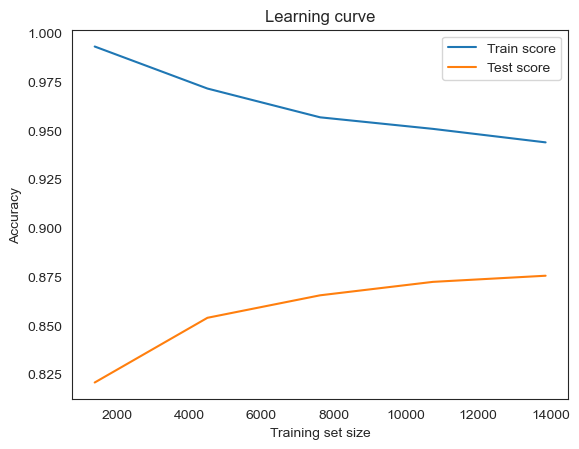

In [50]:
# use learning_curve to get train and test scores for a range of training set sizes
train_sizes, train_scores, test_scores = learning_curve(cb, X_train, y_train, cv=5)
# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
plt.legend(loc='best')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning curve')
plt.show()

###  Model 4 :  Evaluation

In [51]:
summary_statistics(cb, X_train, y_train, X_test, y_test)
print('R^2:', acc_cb)
print('RMSE:',RMSE4T)

Train set score: 0.9388884815116125
Test set score: 0.8768963768745451
Adjusted R^2: 0.9388390870621675
R^2: 0.8768963768745451
RMSE: 49392.02399630355


## Models evaluation summary

In [52]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree' ,'Random Forest','Catboost'], 'RMSE' : [RMSE1T,RMSE2T,RMSE3T,RMSE4T], 
    'R2 Score': [acc_lm*100, acc_clf*100,acc_reg*100,acc_cb*100]})
models.sort_values(by='R2 Score', ascending=False)

,Model,RMSE,R2 Score
3,Catboost,49392.023996,87.689638
2,Random Forest,71403.249201,83.650566
1,Decision Tree,78315.453691,80.158086
0,Linear Regression,114640.202846,66.061616


#### -We choosed CatBoost to deploy the model for its high accurcy, low RMSE and  fast results. 